### Sales volumes

The file *volume.csv* contains sales volumes of different companies. Read the file, and calculate the mean sales volumes of each company in the year 2010. Assign the series to the variable *volumes2010*. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

from datetime import datetime
from pandas.tseries.offsets import *
import pytz

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = 'volume.csv'

# YOUR CODE HERE
df = pd.read_csv(file, delimiter=',')
df.head()
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

df['Date'] =pd.to_datetime(df['Date'], format = "%Y-%m-%d")

volumes2010 = df[df.Date.dt.year == 2010].mean()


# YOUR CODE ENDS HERE

In [3]:
print(volumes2010)

AA      3.113912e+07
AAPL    2.140376e+07
GE      7.223856e+07
IBM     6.422816e+06
JNJ     1.214678e+07
MSFT    6.306716e+07
PEP     6.962504e+06
SPX     4.566245e+09
XOM     2.643224e+07
dtype: float64


On which day did the sales volume of Apple (AAPL) overtake the sales volume of Microsoft (MSFT) for the first time? Calculate the value and assign the timestamp to the variable changeover.

In [4]:
changeover = list(df[df[['Date','AAPL','MSFT']].apply(lambda x : (x['AAPL']>x['MSFT']),axis=1)]['Date'])[0]

In [5]:
print(changeover)

1992-08-06 00:00:00


Format the date that you have found in a nicer way corresponding to the style dd/mm/yy. Thus, the day (dd), month (mm), and the year (yy) are formatted in 2 digits, separated by slashes. Assign the string to the variable nicedate.

In [6]:
nicedate = changeover.strftime("%d/%m/%Y")

In [7]:
print(nicedate)

06/08/1992


Apple has to report every end of the year (31 December) what its current sales volume is (not cumulative!). Create a time series for every year with the sales volume listed for Apple (AAPL) on 31 December. If the data does not contain a record for this date, then take the last known value that this known prior to that date. Assign the time series to the variable apple_report.

In [8]:
aapl_df = df[['Date','AAPL']]

In [9]:
aapl_sale = aapl_df[aapl_df.groupby(aapl_df.Date.dt.year)['Date'].transform(max) == aapl_df['Date']]
apple_report = pd.Series(aapl_sale['AAPL'].values, index=aapl_sale['Date'])

In [10]:
print(apple_report)

Date
1990-12-31     1593200.0
1991-12-31     4802000.0
1992-12-31     3302000.0
1993-12-31     5765200.0
1994-12-30     2616400.0
                 ...    
2007-12-31    19261900.0
2008-12-31    21697900.0
2009-12-31    12586100.0
2010-12-31     6911000.0
2011-10-14    20450000.0
Length: 22, dtype: float64


The volumes of Apple are highly fluctuating over time. You can clearly see that when you make a plot. It would be better to smooth out the sales volume by taking a moving average with a period of 200 days. Calculate the moving average of the sales volume and assign the series to the variable apple_smooth. Create a plot with the original time series and the smooth version of the time series.

In [11]:
aapl_df['Sale_volume_avg'] = aapl_df['AAPL'].rolling(200).mean()
aapl_df.dropna(inplace=True)
apple_smooth = pd.Series(aapl_df['Sale_volume_avg'].values, index=aapl_df['Date'])

In [12]:
print(apple_smooth)

Date
1990-11-14     6260150.0
1990-11-15     6268122.0
1990-11-16     6279604.0
1990-11-19     6301426.0
1990-11-20     6315680.0
                 ...    
2011-10-10    18033579.0
2011-10-11    18097018.0
2011-10-12    18176636.0
2011-10-13    18223393.5
2011-10-14    18297519.5
Length: 5273, dtype: float64


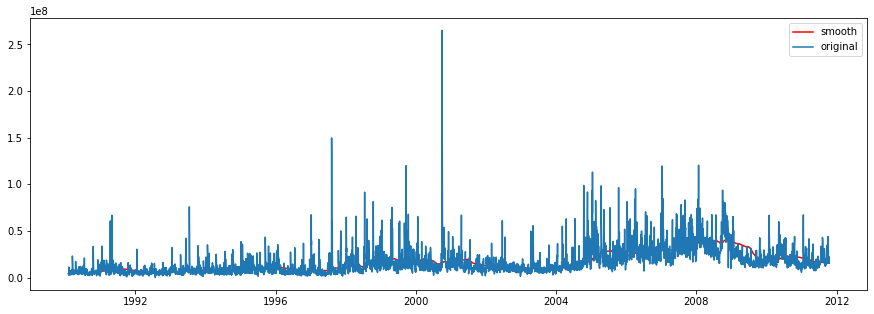

In [13]:
plt.figure(figsize=(15,5))
plt.plot(apple_smooth,label='smooth',color='r')
plt.plot(df['Date'],df['AAPL'],label='original')
plt.legend()
plt.show()